# 1. Lasso Regression
# 2. Ridge Regression
# 3. Gradient Boosting Regressor
# 4. Extra Gradient Boosting Regressor ( XGB )
# 5. Support Vector Regressor
# 6. Random Forest Regressor

In [141]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [142]:
#Data Collection
df=pd.read_csv('Insurance Dataset.csv')

In [143]:
#Data Understanding
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


<Axes: >

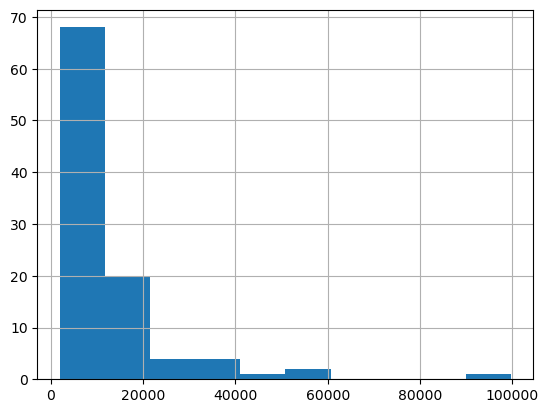

In [100]:
df['Claims made'].hist()

In [305]:
df.corr()

,Premiums Paid,Age,Days to Renew,Claims made,Income
Premiums Paid,1.000000,0.554314,0.129884,0.567047,0.880833
Age,0.554314,1.000000,0.118577,0.331819,0.309009
Days to Renew,0.129884,0.118577,1.000000,0.654598,0.090823
Claims made,0.567047,0.331819,0.654598,1.000000,0.492533
Income,0.880833,0.309009,0.090823,0.492533,1.000000


In [308]:
log_data = np.log(df)

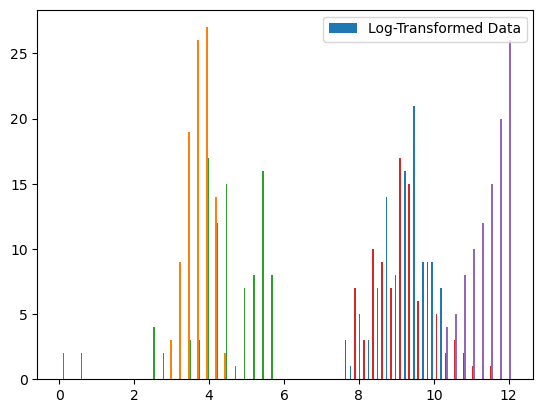

In [314]:
# Plot the original data and the log-transformed data
import matplotlib.pyplot as plt
#plt.hist(df, bins=50, label='Original Data')
plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

In [144]:
df['Claims made'].mean()

12578.993366769999

In [145]:
df['Claims made'].min()

1978.26087

In [146]:
df['Claims made'].max()

99676.74419

<Axes: >

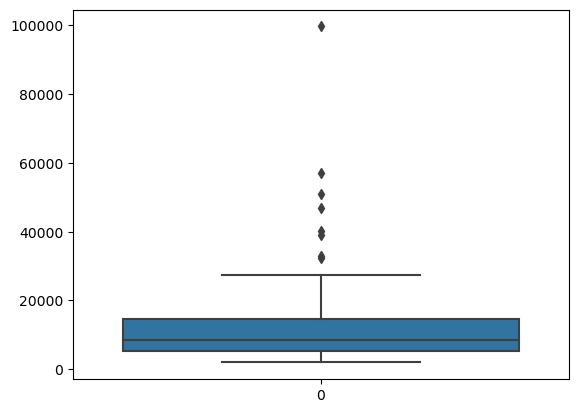

In [307]:
#outlier check
import seaborn as sns
sns.boxplot(df['Claims made'])

In [461]:
#Splitting data into input and output
y=df['Claims made']
X=df.drop(['Claims made'], axis=1)

In [329]:
y.head()

0    3890.076336
1    2294.444444
2    2564.545455
3    1978.260870
4    2009.090909
Name: Claims made, dtype: float64

In [330]:
X.head()

,Premiums Paid,Age,Days to Renew,Income
0,2800,26,233,28000
1,2950,27,130,29500
2,3100,28,144,31000
3,3250,30,65,32500
4,3400,32,56,34000


In [462]:
#Splitting the data into X_train & y_train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


# LASSO REGRESSION

In [410]:
# Create an instance of LassoRegression
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso()

In [411]:
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

Lasso()

In [412]:
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)

In [413]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred_lass)) #Coefficient of Determination
print(mean_squared_error(y_test,y_pred_lass))

0.8202592119032965
15673592.107483428


In [414]:
print("Model Score: ", lasso_reg.score(X_test, y_test))

Model Score:  0.8202592119032965


In [415]:
#Training Accuracy
y_pred_tr =lasso_reg.predict(X_train)
print(r2_score(y_train, y_pred_tr)) #Coefficient of Determination
print(mean_squared_error(y_train,y_pred_tr))

0.6471062504356657
74211129.97372136


# Standard Scaler


In [81]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Normalizer

In [87]:
from sklearn.preprocessing import Normalizer
#fit command maintainss the equation structure
X_n = Normalizer().fit_transform(X)


# RIDGE REGRESSION

In [449]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [438]:
y_pred_r =rr.predict(X_test)
y_pred_r

array([ 6300.51640315,  1508.39290067, 24439.20070698,  7015.12754888,
       11495.21417213,  1493.85101726, 12137.97084018, 18958.40134132,
       35080.32797116, 38778.991707  , 13792.04447862,  4723.18478847,
       27255.11063286,  9022.72913314,  9929.25508509, 11182.78406463,
       22166.07864025, 11381.63398311,  9336.1926555 , 13727.48862791])

In [439]:
#Accuracy of the model
print(r2_score(y_test, y_pred_r)) #Coefficient of Determination
print(mean_squared_error(y_test,y_pred_r))

0.8202582988471444
15673671.72697242


In [445]:
#Training Accuracy
y_pred_trr =rr.predict(X_train)
print(r2_score(y_train, y_pred_trr)) #Coefficient of Determination
print(mean_squared_error(y_train,y_pred_trr))

0.6471062504785565
74211129.9647017


In [440]:
Ridge_train_score = rr.score(X_train, y_train)
Ridge_test_score = rr.score(X_test, y_test)
print(Ridge_test_score)
print(Ridge_train_score)

0.8202582988471444
0.6471062504785565


In [451]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)


Ridge(alpha=100)

In [452]:
Ridge_train_score100 = rr100.score(X_train, y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print(Ridge_test_score100)
print(Ridge_train_score100)

0.8202921165373955
0.6471062217879207


# GRADIENT BOOSTING METHOD

In [481]:

from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 3,'max_depth': 3,'learning_rate': 1,'criterion': 'friedman_mse'}
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**params)

In [482]:
# Fit the model
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=3)

In [483]:
pred=gbr.predict(X_test)
pred

array([ 4256.99062943,  4256.99062943, 19058.51126525,  7948.49740155,
        7948.49740155,  3186.84435662,  7948.49740155, 12978.52066573,
       35718.61718687, 42699.9599482 , 10550.23109378,  7948.49740155,
       16768.34147937,  7948.49740155,  7948.49740155, 11159.447785  ,
       14935.85062395, 12885.454545  ,  7948.49740155,  5518.42778137])

In [484]:
# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.944


In [485]:
#Accuracy of the model
print(r2_score(y_test, pred)) #Coefficient of Determination
print(mean_squared_error(y_test,pred))

0.944067452207702
4877378.9684127895


In [486]:
#Training Accuracy
pred_gr=gbr.predict(X_train)
print(r2_score(y_train, pred_gr)) #Coefficient of Determination
print(mean_squared_error(y_train,pred_gr))

0.9910319468215639
1885919.942922743


# EXTRA GRADIENT BOOSTING REGRESSOR

In [496]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/94/41/143e80c1f48f7e826380f382dff6caf93a698c77bf2e9e38290bbbfbfe42/xgboost-1.7.6-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.9 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [516]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',  # For regression
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)

In [517]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [519]:
y_pred_regressor = xgb_regressor.predict(X_test)
y_pred_regressor

array([ 5538.8184,  4141.3364, 18379.617 ,  8402.485 ,  8781.89  ,
        3039.4285,  8952.63  , 12174.562 , 31987.244 , 37655.5   ,
        8922.304 ,  8014.885 , 17535.229 ,  8348.772 ,  8666.492 ,
       10357.867 , 15657.882 , 11941.11  ,  7616.108 ,  9213.533 ],
      dtype=float32)

In [521]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_regressor)

ValueError: continuous is not supported

In [522]:
#Accuracy of the model
print(r2_score(y_test, y_pred_regressor)) #Coefficient of Determination
print(mean_squared_error(y_test,y_pred_regressor))

0.9722697762261722
2418105.656944033


In [523]:
#Training Accuracy
pred_xgr=xgb_regressor.predict(X_train)
print(r2_score(y_train, pred_xgr)) #Coefficient of Determination
print(mean_squared_error(y_train,pred_xgr))

0.999664440002513
70565.96105268707


# SUPPORT VECTOR REGRESSOR

In [542]:
# Fit the model over the training data
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR()

In [539]:
#predict the X_test
y_pred_svm=svr.predict(X_test)
y_pred_svm

array([8136.41913632, 8131.17082738, 8132.97207831, 8148.07532307,
       8151.58571174, 8125.77329154, 8144.67882708, 8155.20900296,
       8155.1126844 , 8156.00619502, 8125.55477104, 8147.63649123,
       8153.98782784, 8150.88143572, 8148.50555624, 8155.45745697,
       8155.9260568 , 8147.50760313, 8145.33080527, 8138.8752728 ])

In [544]:
#Accuracy of the model
print(r2_score(y_test, y_pred_svm)) #Coefficient of Determination
print(mean_squared_error(y_test,y_pred_svm))
mse1 = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse1)

-0.19192907512549495
103937511.02568807


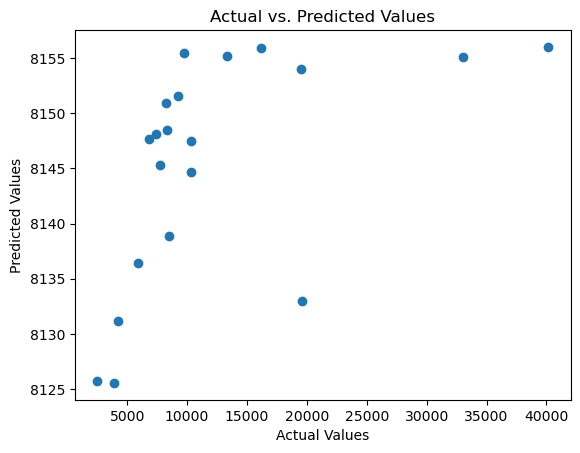

In [545]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_svm)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# RANDOM FOREST REGRESSOR

In [565]:
#Fit the model into the data
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=41)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=41)

In [566]:
#Predict the data on X_test
y_pred_rf = rf_regressor.predict(X_test)
y_pred_rf

array([ 6112.35142451,  4273.55284113, 18003.4437243 ,  8073.12582214,
        9144.89609632,  2419.47145714,  9922.88887473, 13027.23957923,
       29174.8593248 , 31546.1116441 , 10127.33512421,  7619.63573046,
       17126.4581164 ,  8141.53748997,  8785.81264144, 10722.60017856,
       16676.9518741 , 10528.17038758,  7869.98439469,  8661.85637362])

In [567]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 6946851.590451484
Root Mean Squared Error (RMSE): 2635.688067744642
R-squared (R^2): 0.9203352638568142


In [568]:
#feature importance
feature_importances = rf_regressor.feature_importances_
feature_importances

array([0.18325819, 0.02712841, 0.71141556, 0.07819784])

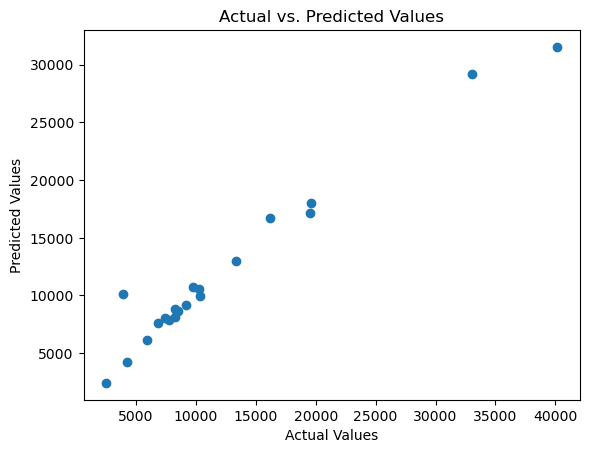

In [569]:
import matplotlib.pyplot as plt

# Visualization examples
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
